#  Python: Projeto Final



##  ANÁLISE DE DADOS PREVENÇÃO DE INADIMPLÊNCIA

## Prever e entender o comportamento de clientes inadimplêntes
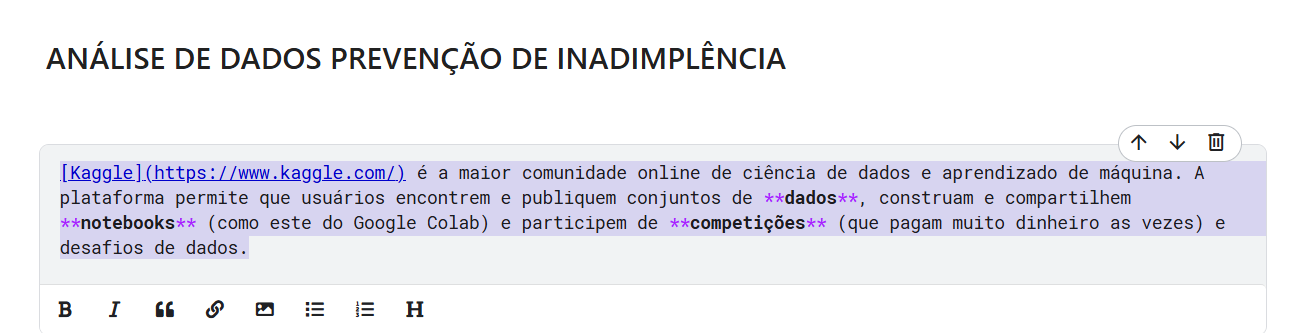

> No contexto econômico, a capacidade de prever cenários é fundamental, pois decisões estratégicas e investimentos estão diretamente ligados à avaliação dos riscos envolvidos. Quando se trata da concessão de crédito, é essencial que a instituição financeira estime a probabilidade de o cliente não cumprir com o pagamento, o que o tornaria inadimplente e comprometeria o retorno esperado.

> Por meio da análise dos dados dos clientes, é possível identificar padrões de comportamento e características comuns entre aqueles que apresentam risco de inadimplência. Isso permite uma avaliação mais precisa na hora de aprovar ou negar o crédito solicitado.

>A principal variável analisada nesse conjunto de dados é a chamada “default”, que indica se o cliente está inadimplente ou já esteve em algum momento. Essa variável assume valores booleanos: 0 para clientes adimplentes e 1 para os inadimplentes.


## Biblioteca

## Pacotes utilizados


> pandas: Para a manipulação dos dados
> 
>seaborn e matplotlib: Para visualização gráfica

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dados

Criação do Data Frame utilizando o arquivo CSV.

In [74]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

Estrutura

Avaliar a extensão do DataFrame e investigar como a variável principal se comporta em diferentes situações.

In [75]:
df.shape
df[df['default'] == 0].shape
df[df['default'] == 1].shape
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape
print(df.shape)
print(df[df['default'] == 0].shape)
print(df[df['default'] == 1].shape)
print(f"A proporção clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporção clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

(10127, 16)
(8500, 16)
(1627, 16)
A proporção clientes adimplentes é de 83.93%
A proporção clientes inadimplentes é de 16.07%


Nos dados há um total de 10127 clientes e com a variável de interesse Default possuindo dois cenários possíveis, 0 para adiplentes ou 1 para inadimplentes. Separando a variável de interesse nos dois grupos, obtvemos uma porcentagem de 83.93% de Adiplentes e 16.07% de Inadimplentes, essa diferença enorme é natural para uma entidade financeira saudável, onde é interesssante ter mais pagadores fiéis do que devedores

 Schema

Relacionar o assunto de cada coluna com o tipo de dado, visando uma melhor adequação ao problema trabalhado.

 - Colunas e seus respectivos tipos de dados.

In [76]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 - Atributos **categóricos** (Variáveis explicativas que possuem classificações).

Os atributos categóricos são relacionados a categorias, a maioria se encaixa em suas classificações, porém o "valor_transacoes_12m" e "limite_credito" estão como categóricos e para nosso problema é de interesse que eles sejam quantificáveis(numéricos), nescessitando de tratamento desses dados.

Informações estatisticas dos atributos categóricos:

In [77]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


 - Atributos **numéricos** (Variáveis numéricas quantificáveis).

Os atributos numéricos também se encaixam na proposta do problema, a variável "ID" nesse Data Frame se encontra como numérico, mas pode ser transformado para categórico caso seja preciso, porém como neste caso não faz sentido utilizarmos será, retirado.

In [78]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


Os dados se mostram confiáveis e competentes, porém nos atributos categóricos possuem colunas com um count diferente do total do Data Frame que é de 10127 o que representa que existem dados faltantes no Data Frame e que também precisa ser tratado para melhorar a qualidade das informações e análise.

Entender qual o impacto dos dados faltantes nas nossas informações e no balanceamento da variável resposta.

In [79]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

Como previsto, há três colunas que apresentam valores ausentes: escolaridade, estado civil e salário anual. É importante analisar estatisticamente esses dados incompletos e compreender como eles influenciam as duas categorias da variável de resposta “Default”.

A função stats_dados_faltantes examina cada coluna do conjunto de dados e, ao identificar valores ausentes, contabiliza a quantidade e cria um dicionário com a porcentagem correspondente em cada coluna. Isso permite avaliar o impacto que esses dados faltantes podem ter na análise do problema.


In [80]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [81]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


Dados faltantes para Adimplentes:

In [82]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


Dados faltantes para inadimplentes:

In [83]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


Embora haja variação na quantidade absoluta de dados ausentes entre os dois grupos da variável de interesse, observa-se uma proporcionalidade equilibrada. Isso indica que a remoção dessas linhas terá impacto mínimo na qualidade da análise.

##  Transformação e limpeza de dados

Tendo compreendido mais profundamente as características do nosso conjunto de dados, vamos realizar uma etapa chamada de "data wrangling", que envolve a organização, tratamento e preparação dos dados para facilitar uma análise mais eficiente. Especificamente, iremos excluir:

 - Corrigir o *schema* das nossas colunas;
 - Remover os dados faltantes.

Correção de schema

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (dtype = object) isso acontece por conflito de formato na definição de um dado float. E para transformar usaremos uma função para reposicionar as vírgulas e pontos, para que o sistema entenda esse valores como floats.

Vamos criar uma função `lambda` para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional `map`:

In [84]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Analisando novamente os tipos de cada coluna e agora já transformadas as colunas limite_credito e valor_transacoes_12m para atributos numéricos:

In [85]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 Remoção de dados faltantes

Conforme observado anteriormente, os registros com valores ausentes estão distribuídos de forma proporcional entre as duas categorias da variável resposta “Default”. Por isso, a exclusão dessas linhas não comprometerá a integridade nem o equilíbrio da análise, contribuindo para uma visualização mais clara. O resultado é um DataFrame mais compacto, porém com os dados preservando sua consistência e qualidade.

In [87]:
df.dropna(inplace=True)

In [88]:
df.shape

(7081, 16)

In [89]:
df[df['default'] == 0].shape

(5968, 16)

In [90]:
df[df['default'] == 1].shape

(1113, 16)

In [92]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [93]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


Pode-se concluir que a exclusão dos dados ausentes não resultou em uma perda significativa de informações. Pelo contrário, contribuiu para melhorar o equilíbrio e a qualidade do conjunto, uma vez que o DataFrame agora está completo, sem registros faltantes.

## Visualização de dados

>Após o tratamento e refinamento dos dados, é possível criar gráficos e tabelas que contribuem para uma compreensão mais clara e para a antecipação de comportamentos associados à inadimplência, mesmo antes que o cliente deixe de cumprir suas obrigações.

>Para aprofundar a análise da relação entre a variável resposta “Default” e os demais atributos do conjunto de dados, foram construídos dois DataFrames distintos: um contendo os registros dos clientes adimplentes e outro com os inadimplentes.

>Vale a pena deixar claro que essa análise segue as diretrizes estabelecidas pela LGPD (Lei Geral de Proteção de Dados). Não irá ser feito análise com nenhuma variável sensível.


Começamos então importando os pacotes de visualização e separando os clientes adimplentes e inadimplentes

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [101]:
df_adimplente = df[df['default'] == 0]

In [102]:
df_inadimplente = df[df['default'] == 1]

Analisar a variável de resposta em conjunto com os atributos categóricos e numéricos de forma separada, considerando que cada tipo apresenta estatísticas distintas. Essa abordagem inclui a comparação entre o DataFrame original e os dois subconjuntos gerados com base nas categorias da variável de interesse

**Visualizações categóricas**

**Escolaridade**

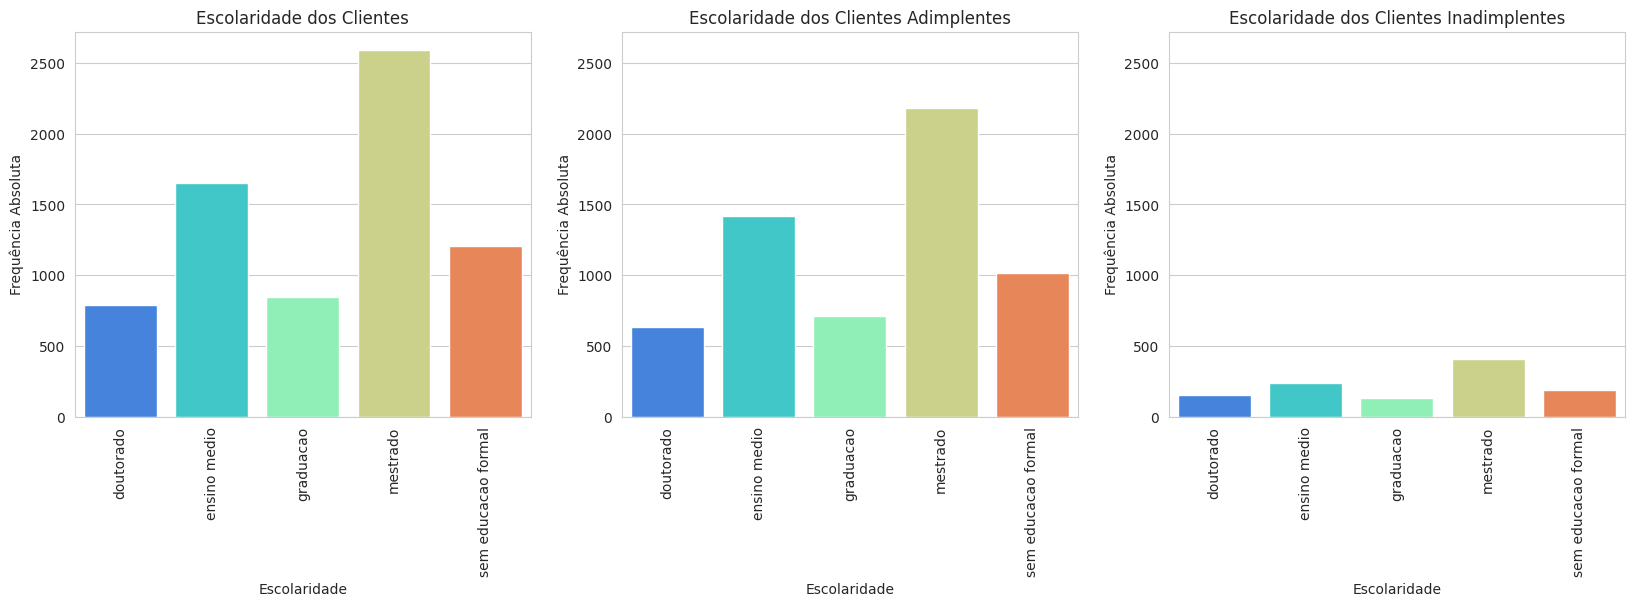

In [111]:
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.columns = ['frequencia_absoluta']


  df_to_plot.reset_index(inplace=True)
  df_to_plot.rename(columns={'index': coluna}, inplace=True)

  df_to_plot.sort_values(by=[coluna], inplace=True)

  
  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo],palette='rainbow')
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Observa-se que a maioria dos clientes possui ensino superior, embora também haja uma quantidade significativa de pessoas sem qualquer nível de escolaridade, evidenciando uma polarização nesse aspecto educacional.
Vale destacar que o propósito desta análise é identificar padrões de comportamento e características que diferenciam os clientes inadimplentes dos adimplentes.


No entanto, ao examinar o atributo "Escolaridade", percebe-se que a distribuição permanece bastante semelhante nos três gráficos analisados. Isso indica que, neste caso específico, o nível de instrução não parece exercer influência significativa sobre a probabilidade de inadimplência.


**Salário Anual**

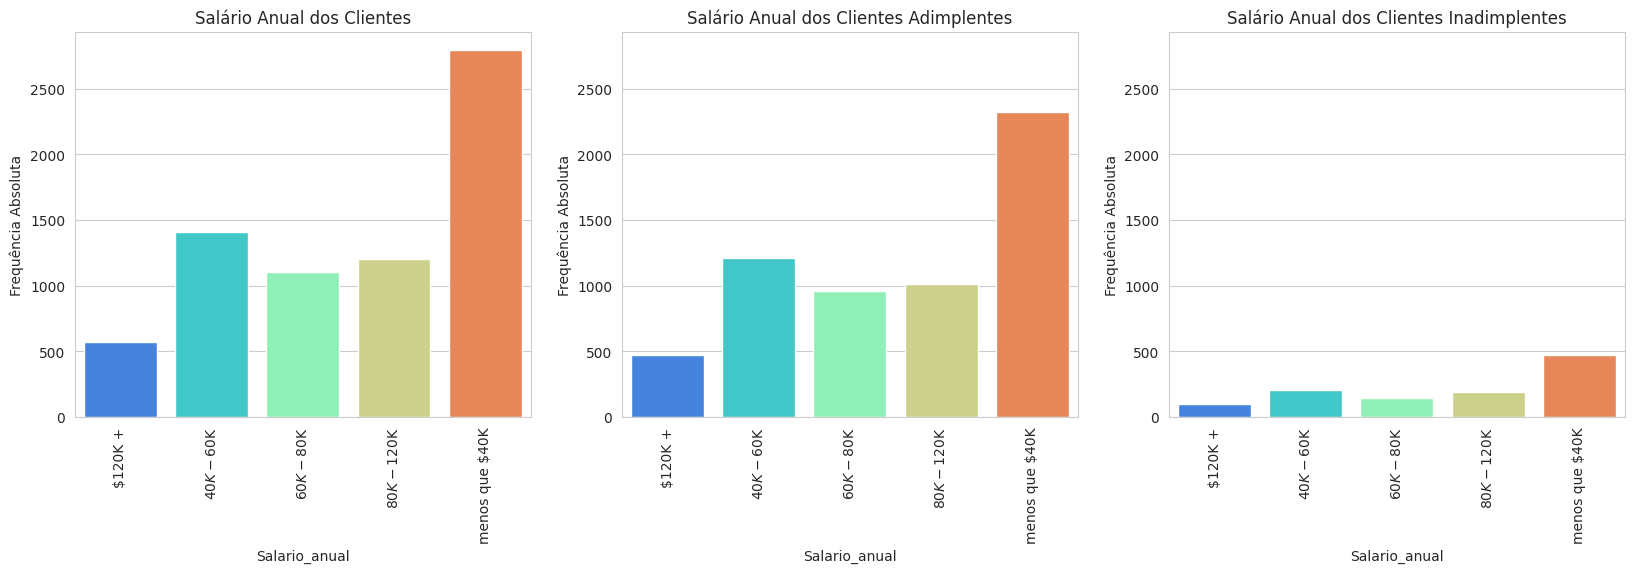

In [112]:
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().to_frame()
  df_to_plot.columns = ['frequencia_absoluta']


  df_to_plot.reset_index(inplace=True)
  df_to_plot.rename(columns={'index': coluna}, inplace=True)

  df_to_plot.sort_values(by=[coluna], inplace=True)

  
  f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo],palette='rainbow')
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

figura.show()

Ao observar o atributo "Salário Anual", nota-se que a maior parte dos clientes da instituição financeira possui rendimentos abaixo de 40 mil por ano. Essa informação pode ser relevante para definir estratégias de investimento e segmentação de carteiras. No entanto, o foco da análise é identificar fatores que influenciam a inadimplência. Ao examinar os três gráficos, percebe-se que os padrões de comportamento são bastante semelhantes entre os grupos, indicando que o nível de salário anual não exerce impacto significativo sobre o risco de o cliente se tornar inadimplente.



**Visualizações numéricas**

**Quantidade de Transações no Último Ano**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


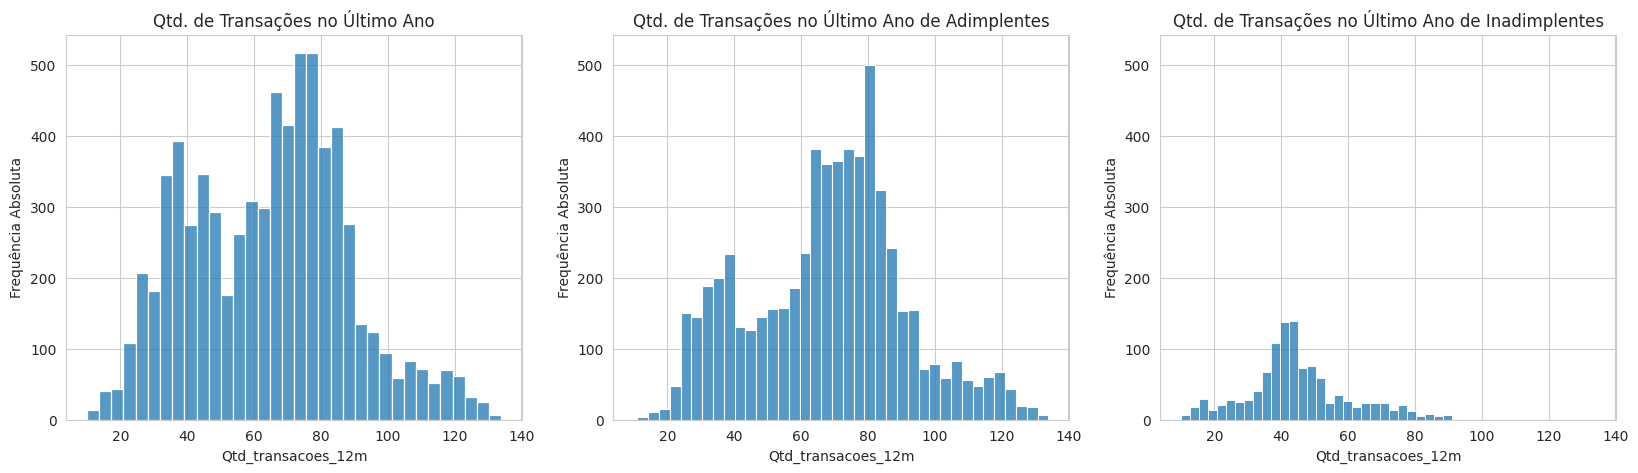

In [98]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Para variáveis numéricas, o uso de histogramas é bastante apropriado, pois permite visualizar a frequência com que determinados valores aparecem na amostra. No caso da variável “qtd_transacoes_12m”, o histograma revela quantas vezes cada faixa de número de transações anuais ocorre, facilitando a comparação entre os grupos da variável de interesse.

Observando os gráficos, percebemos que o ponto de maior concentração entre os clientes adimplentes está em torno de 80 transações por ano, enquanto entre os inadimplentes esse pico ocorre em cerca de 40 transações anuais — ou seja, metade da frequência dos adimplentes.
Essa diferença evidencia um padrão de comportamento: clientes que realizam mais transações ao longo do ano tendem a manter seus pagamentos em dia, enquanto aqueles com menor atividade transacional apresentam maior risco de inadimplência.


**Valor das Transações no Último Ano**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


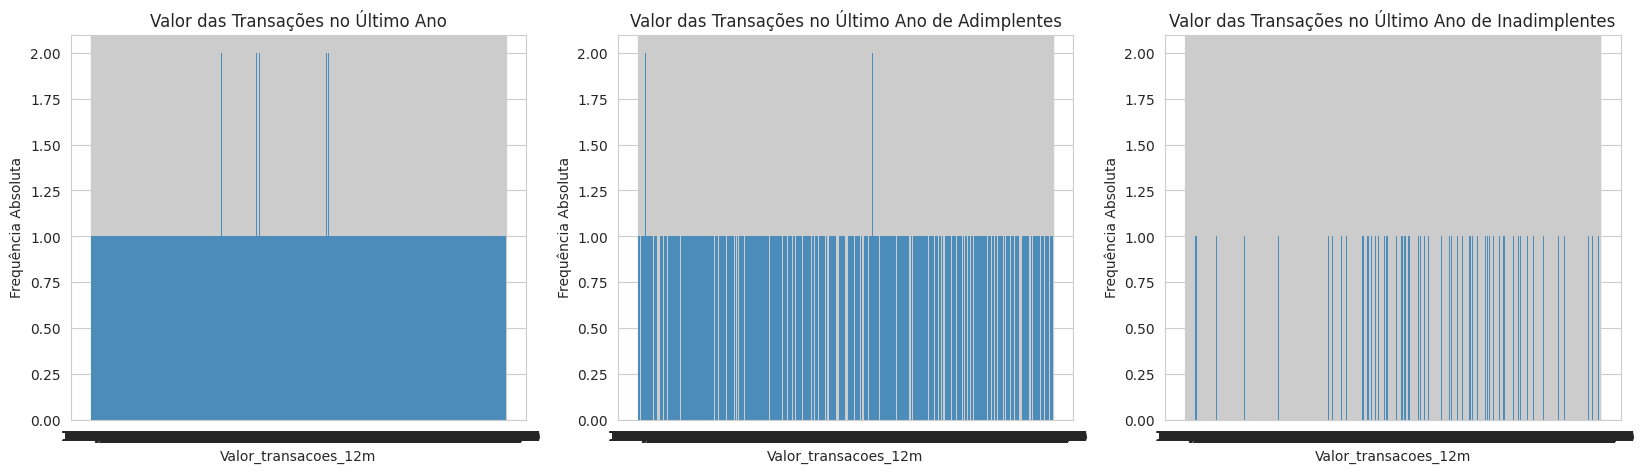

In [116]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Mantendo o raciocínio aplicado à quantidade de transações anuais, agora examinamos o valor total movimentado ao longo do ano. Utilizamos novamente o histograma para visualizar a frequência com que os valores se repetem em cada grupo. Mais uma vez, identificamos uma diferença clara entre os perfis da variável de interesse: o ponto de maior concentração entre os clientes adimplentes está em torno de R$ 5.000,00enquanto entre os inadimplentes esse pico ocorre em aproximadamente entre 
R$ 1.500,00 a R$ 2.500,00 — ou seja, metade do valor observado no grupo dos bons pagadores.
Essa representação gráfica nos permite concluir que quanto maior o volume financeiro movimentado por um cliente ao longo do ano, menor tende a ser a probabilidade de ele se tornar inadimplente.

**Valor de Transações no Último Ano x Quantidade de Transações no Último Ano**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


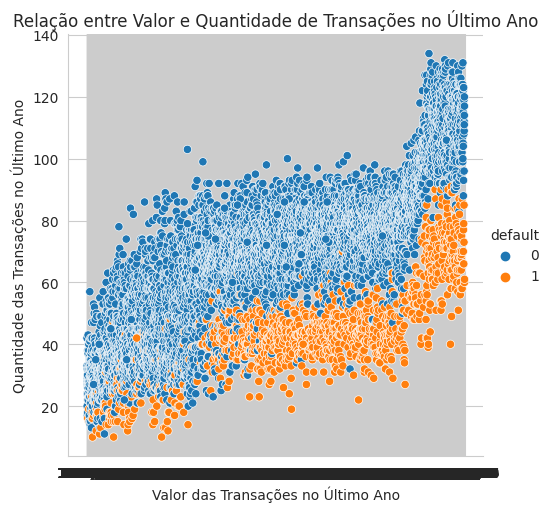

In [106]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

Ao analisar um gráfico que relaciona a **quantidade e o valor das transações**, percebe-se com clareza que clientes com menor volume de operações e valores mais baixos apresentam maior probabilidade de se tornarem inadimplentes. Com base nessa informação, a instituição financeira pode antecipar-se ao risco, identificando clientes que seguem esse perfil e adotando medidas estratégicas para oferecer alternativas econômicas que evitem a inadimplência.


## Resumo dos Insigts



Analise de dados de crédito com o intuito de trabalhar com a inadimplência. Através da exploração e visualização dos dados, pudemos identificar alguns padrões importantes.

Inicialmente, observamos que a base de clientes possui aproximadamente 16% de inadimplentes. Embora dados faltantes tenham sido identificados e removidos, a proporção entre adimplentes e inadimplentes se manteve estável, o que nos dá confiança na representatividade dos dados restantes.

Ao analisar os atributos categóricos como escolaridade e salário anual, percebemos que, isoladamente, eles não parecem ser os principais motores da inadimplência. As distribuições de clientes adimplentes e inadimplentes nessas categorias são bastante similares.

No entanto, quando voltamos nosso olhar para os atributos numéricos relacionados à atividade do cliente, como a quantidade e o valor das transações nos últimos 12 meses, um padrão distinto emerge. Vemos claramente que os clientes que se tornaram inadimplentes realizaram significativamente menos transações e movimentaram um volume financeiro menor no último ano, em comparação com os clientes adimplentes.

A visualização da relação entre o valor e a quantidade de transações reforça essa observação: os inadimplentes se agrupam em uma região do gráfico que representa baixa atividade transacional. Isso sugere que uma diminuição na frequência e no valor das transações pode ser um sinal de alerta precoce para um cliente em potencial dificuldade financeira.

Fatores que parecem contribuir para a inadimplência:

Baixa Atividade Transacional: Clientes com menor quantidade e valor de transações nos últimos 12 meses demonstram maior propensão à inadimplência. Isso pode indicar dificuldades financeiras, mudança de comportamento de consumo ou utilização de outros meios de pagamento.

Com base nesses insights, podemos considerar as seguintes estratégias para minimizar a inadimplência:

Monitoramento da Atividade Transacional: Implementar um sistema de monitoramento contínuo da quantidade e valor das transações dos clientes. Quedas abruptas ou persistentes podem acionar alertas para a equipe de risco.

Campanhas de Engajamento: Para clientes com baixa atividade, realizar campanhas direcionadas para entender os motivos e incentivar a utilização do cartão de crédito (se apropriado e alinhado com a política da instituição).

Análise Preditiva: Utilizar os dados de transação, juntamente com outros atributos relevantes, para construir modelos preditivos de inadimplência mais sofisticados. Isso permitiria identificar clientes de alto risco com antecedência.

Comunicação Proativa: Para clientes identificados como de alto risco, iniciar uma comunicação proativa para oferecer suporte, opções de renegociação ou outros produtos financeiros que possam adequar-se melhor à sua situação atual, antes que a inadimplência se concretize.
Ao focar na atividade transacional como um indicador chave e implementar ações proativas, a instituição financeira pode potencialmente reduzir as taxas de inadimplência e fortalecer o relacionamento com seus clientes.
